# Breast Cancer Detection Using Logistic Regression

(Please run the code on codespace in order to view all the graphs)

In [54]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import plotly.io as pio
pio.renderers.default = "notebook_connected"

%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Downloading the Data

In [55]:
medical_df = pd.read_csv("data.csv")

In [56]:
medical_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


This dataset contains 570 rows and 33 columns. We have no categorical columns. Our objective is to create a model to predict the value in the diagnosis column, which could either take the values "B" or "M".

In [57]:
medical_df.info()

print("\n\nMissing Values in every column: ")
medical_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The "Unnamed: 32" column in your dataset likely represents an extra column that was included during the data import process, possibly from an extra comma or similar artifact in the CSV or data file. 

In [58]:
medical_df = medical_df.drop(columns=['Unnamed: 32'])

print("\n\nMissing Values in every column: ")
medical_df.isnull().sum()



Missing Values in every column: 


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no null values in any of the columns now.

## Exploratory Data Analysis and Visualization

In [59]:
px.histogram(medical_df, x='radius_mean', title='Distribution of Mean Radius Sizes', color='diagnosis')

Smaller radius sizes seems to indicate benign tumors, which are non-cancerous and generally less aggressive. Conversely, larger radius sizes seem to correspond to malignant tumors, which are cancerous and have a higher potential for aggression and spread.

In [60]:
px.histogram(medical_df, x='texture_mean', title='Distribution of Mean Texture', color='diagnosis')

If a histogram of texture_mean shows differences in distribution between M (malignant) and B (benign) groups, it might suggest that more irregular and complex textures are associated with malignant tumors. However, the relationship might not be as strong or as straightforward as with size-related measures. Higher texture_mean values could suggest malignancy due to the disorganized nature of cancerous tissue, while lower values might correlate with the more uniform texture of benign tissues.

In [61]:
px.histogram(medical_df, x='concavity_mean', title='Distribution of Mean Concavity', color='diagnosis')

Tumors with have concavity seems to have a higher chance of being malignant. This is because more aggressive tumors tend to have more irregular shapes and deeper concavities. 

In [62]:
px.histogram(medical_df, x='compactness_mean', title='Distribution of Mean Compactness', color='diagnosis')

Higher values are observed among malignant tumors, which could suggest that denser, more compact tumors are more likely to be cancerous. Conversely, lower compactness might be more typical of benign tumors.

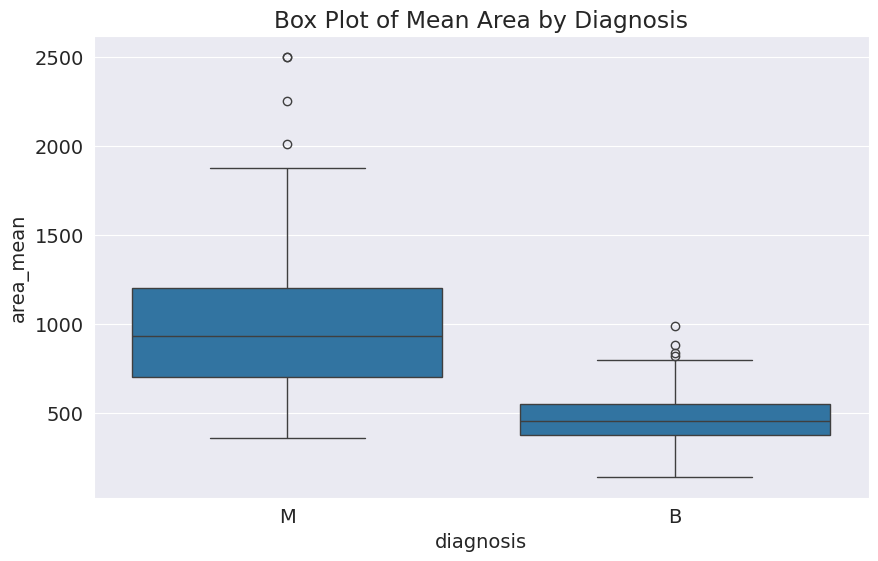

In [63]:
sns.boxplot(x='diagnosis', y='area_mean', data=medical_df)
plt.title('Box Plot of Mean Area by Diagnosis')
plt.show()

Malignant tumors seem to have a higher mean area compared to benign tumors, as aggressive tumors tend to be larger.

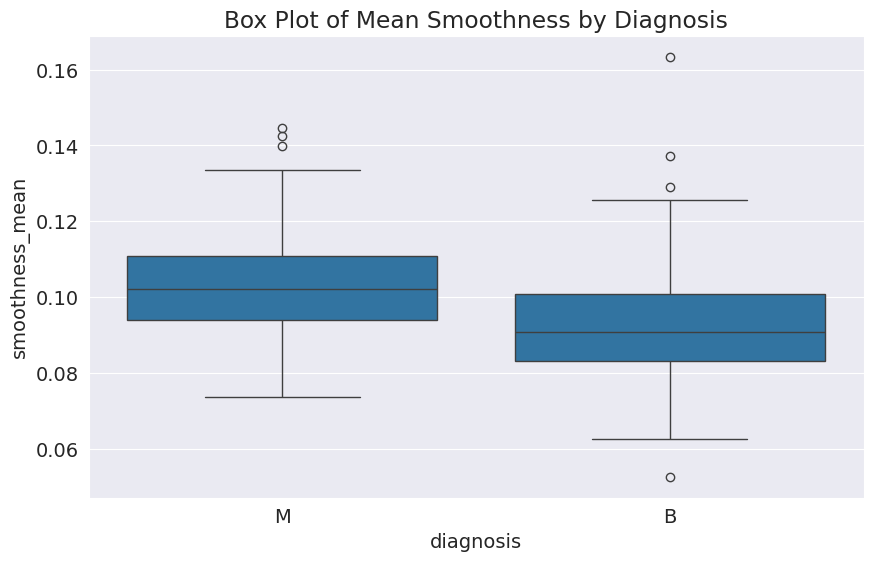

In [64]:
sns.boxplot(x='diagnosis', y='smoothness_mean', data=medical_df)
plt.title('Box Plot of Mean Smoothness by Diagnosis')
plt.show()

Malignant tumors (M) tend to exhibit a higher mean smoothness compared to benign tumors (B). This observation can be linked to the nature of malignant tumors, which often have more irregular and compact cellular structures that might result in a smoother appearance at a microscopic level. 

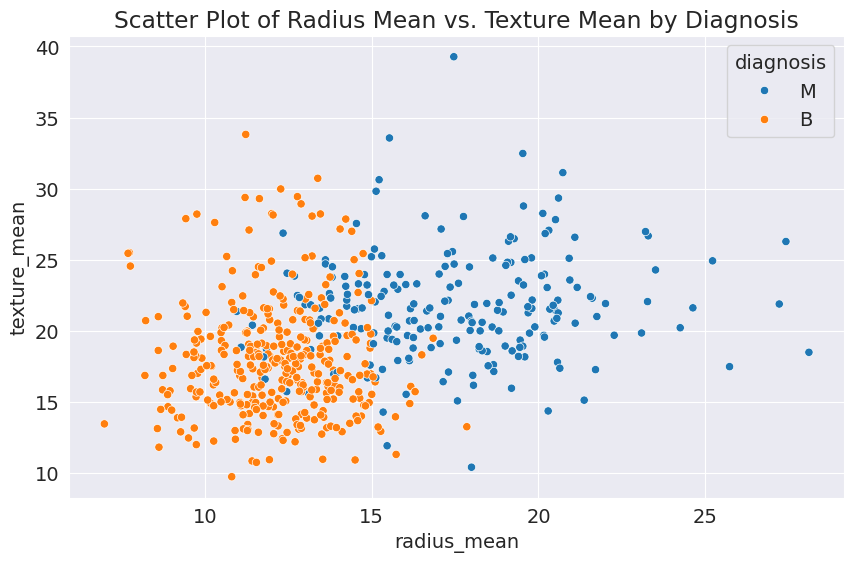

In [65]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=medical_df)
plt.title('Scatter Plot of Radius Mean vs. Texture Mean by Diagnosis')
plt.show()

The scatter plot reveals a discernible trend where as radius_mean increases, texture_mean tends to increase as well, suggesting a positive correlation between the size and texture of the tumors. Notably, benign (B) tumors predominantly cluster in regions characterized by lower values of both radius_mean and texture_mean. In contrast, malignant (M) tumors generally occupy the higher range of both dimensions. A critical observation is the presence of a boundary-like region where the concentration of benign points diminishes and malignant points become prevalent.

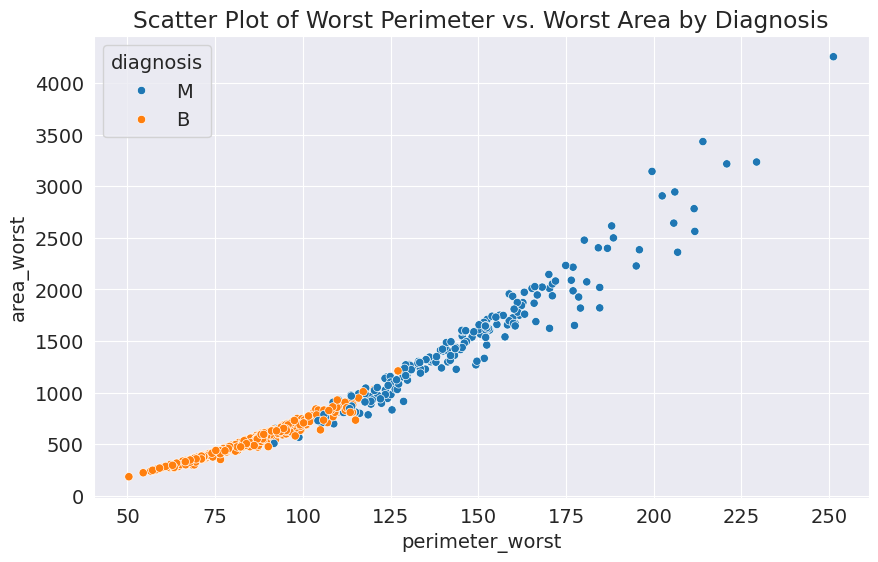

In [66]:
sns.scatterplot(x='perimeter_worst', y='area_worst', hue='diagnosis', data=medical_df)
plt.title('Scatter Plot of Worst Perimeter vs. Worst Area by Diagnosis')
plt.show()

A strong linear correlation is observed, possibly suggesting that larger perimeters and areas are typically associated with malignancy, reflecting more aggressive tumor growth.

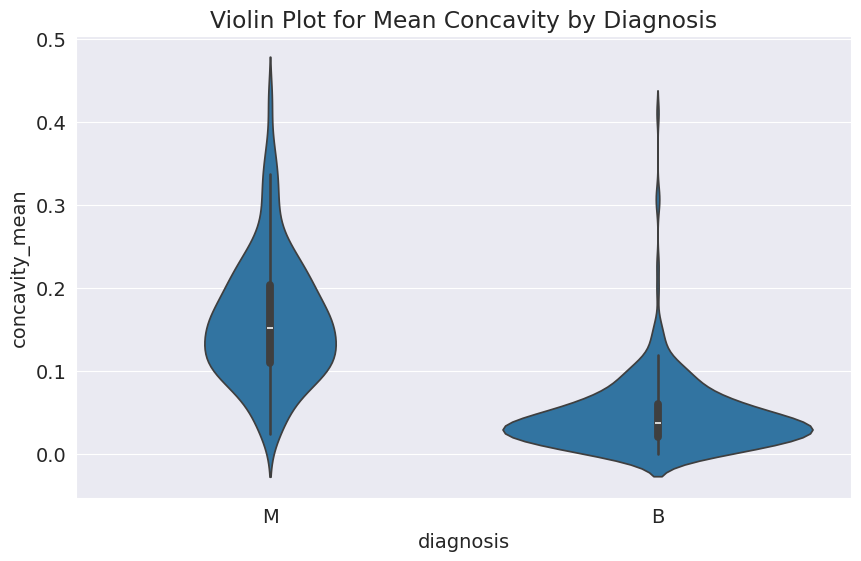

In [67]:
sns.violinplot(x='diagnosis', y='concavity_mean', data=medical_df)
plt.title('Violin Plot for Mean Concavity by Diagnosis')
plt.show()

The plot shows that higher concavity is more prevalent in malignant tumors, suggesting a more aggressive tumor nature.

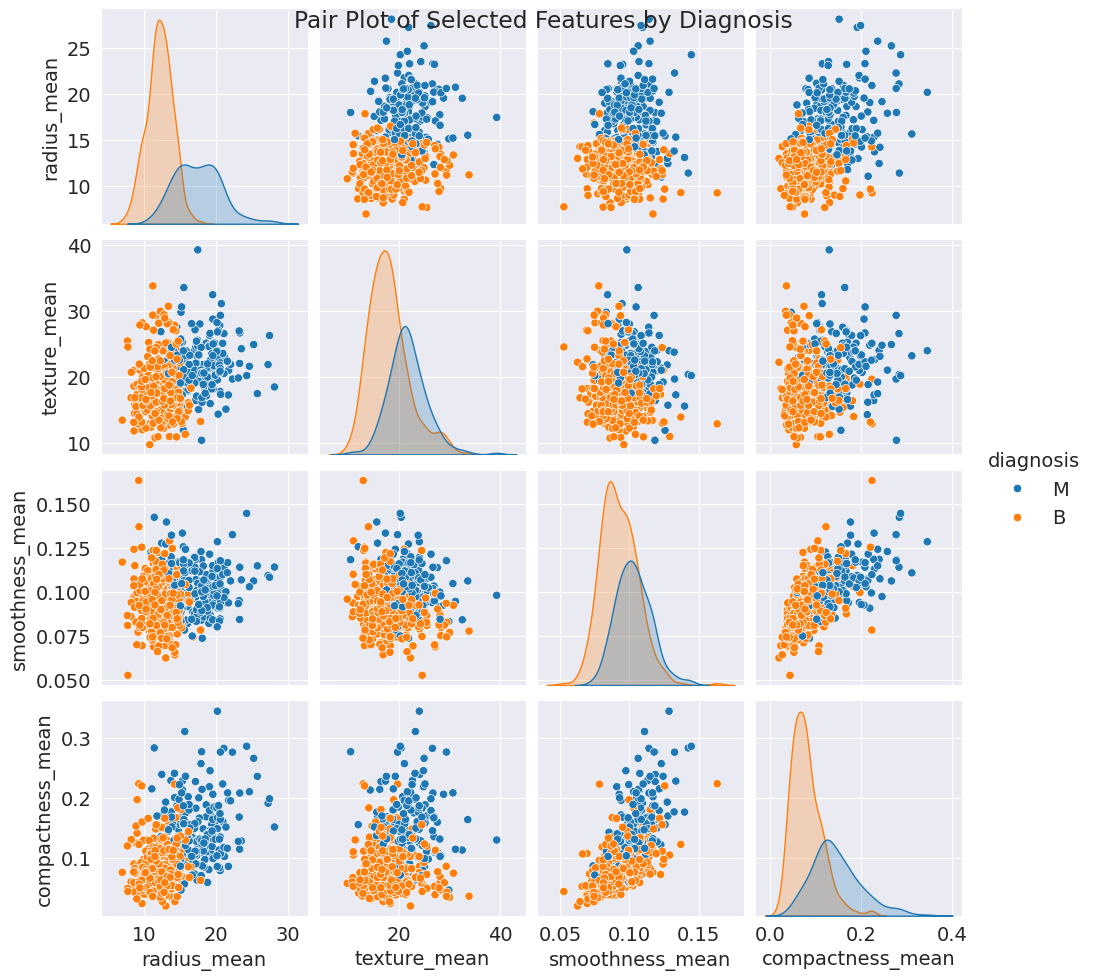

In [68]:
sns.pairplot(medical_df, vars=['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean'], hue='diagnosis')
plt.suptitle('Pair Plot of Selected Features by Diagnosis')
plt.show()

## Training, Validation and Test Sets

In [69]:
train_val_df, test_df = train_test_split(medical_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [70]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (341, 32)
val_df.shape : (114, 32)
test_df.shape : (114, 32)


## Identifying Input and Target Columns

In [71]:
medical_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Here, it is evident that the "id" column is not useful for training the model. So, in our training, validation and test sets, we ignore the "id" column.

In [72]:
input_cols = list(medical_df.columns)[2:]
input_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [73]:
target_col = "diagnosis"

In [74]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [75]:
train_inputs

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,...,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,...,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,...,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,...,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [76]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

## Scaling Numeric Features

In this section, we scale all the numeric features to a range between (0,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

In [77]:
scaler = MinMaxScaler()

In [78]:
scaler.fit(medical_df[input_cols])

MinMaxScaler()

Now, we seperately scale the training, validation, and test sets using the transform method of scalar.

In [79]:
train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

Now, let us review if each of the numeric columns have been appropriately scaled.

In [80]:
train_inputs[input_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,...,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,...,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,...,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,...,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,...,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,...,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,...,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


## Saving Processed Data to Disk

In [81]:
import sys
!{sys.executable} -m pip install pyarrow
!{sys.executable} -m pip install fastparquet
import pyarrow
import fastparquet

In [82]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet', engine='fastparquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet', engine='fastparquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet', engine='fastparquet')

Now that the processed data has been stored to the disk, we do not have to repeat the preprocessing steps every time you use the jupyter notebook. The saved data can be read back using 'pd.read_parquet'.

## Hyperparameter Tuning Using the Validation Set

In [83]:
best_C = None
best_val_accuracy = 0.0

for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
    temp_model = LogisticRegression(C=c, solver='liblinear', random_state=42)
    temp_model.fit(train_inputs, train_targets)
    
    val_preds = temp_model.predict(val_inputs)
    val_accuracy = accuracy_score(val_targets, val_preds)
    
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_C = c

print("Best C:", best_C, "with validation accuracy:", best_val_accuracy)

Best C: 10 with validation accuracy: 0.9736842105263158


## Training a Logistic Regression Model

In [84]:
model = LogisticRegression(C=best_C, solver='liblinear', random_state=42)

In [85]:
model.fit(train_inputs[input_cols], train_targets)

LogisticRegression(C=10, random_state=42, solver='liblinear')

Now, let's check the weights and biases of the trained model.

In [86]:
print(input_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [87]:
print(model.coef_.tolist())

[[1.325844009719659, 2.8881509623934356, 1.3874578426564528, 2.0522913675968857, -0.31201641634011784, -0.2928368997797284, 3.878521697740007, 4.61882246985765, -0.597145707375724, -2.501489852138418, 3.6957248655471133, -1.040252275108614, 2.528747250210496, 2.3271790002234387, 0.7405318396433309, -2.1826361790816047, -0.40872814172800415, -0.36689856578992724, -1.4746545433018912, -1.5494124737105266, 3.095443755892996, 4.065745658474023, 2.38297663814411, 2.856625618930303, 1.9208163149848696, 0.7635629025863236, 3.239570963142666, 2.874266949062511, 3.5106059729900667, 0.26889189760959925]]


In [88]:
print(model.intercept_)

[-10.69489621]


Each weight corresponds to a specific column in the input data. The larger the weight, the more significant the influence of that column on the outcome of the prediction.

## Making Predictions and Evaluating the Model

Now, we use the trained model to make predictions on the test set.

In [89]:
X_train = train_inputs[input_cols]
X_val = val_inputs[input_cols]
X_test = test_inputs[input_cols]

In [90]:
train_preds = model.predict(X_train)

In [91]:
train_preds

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [92]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

In [93]:
accuracy_score(train_targets, train_preds)

0.9882697947214076

The model achieves an accuracy of 98.8% on the training set.


In [94]:
train_probs = model.predict_proba(X_train)
train_probs

array([[9.97848450e-01, 2.15154966e-03],
       [4.35749841e-02, 9.56425016e-01],
       [3.67025253e-05, 9.99963297e-01],
       [9.98765766e-01, 1.23423436e-03],
       [9.88136039e-01, 1.18639614e-02],
       [9.98864272e-01, 1.13572766e-03],
       [9.33679081e-01, 6.63209194e-02],
       [9.42342474e-01, 5.76575264e-02],
       [4.23325739e-01, 5.76674261e-01],
       [9.77553878e-01, 2.24461215e-02],
       [9.76545848e-01, 2.34541521e-02],
       [2.80012962e-02, 9.71998704e-01],
       [9.32203038e-01, 6.77969621e-02],
       [8.24260809e-01, 1.75739191e-01],
       [9.77108225e-01, 2.28917749e-02],
       [9.27924662e-03, 9.90720753e-01],
       [9.93990258e-01, 6.00974181e-03],
       [9.97773216e-01, 2.22678393e-03],
       [9.89939109e-01, 1.00608906e-02],
       [1.50259037e-04, 9.99849741e-01],
       [9.87331670e-01, 1.26683303e-02],
       [9.91599682e-01, 8.40031818e-03],
       [9.97995236e-01, 2.00476400e-03],
       [8.83623640e-05, 9.99911638e-01],
       [8.486324

In [95]:
model.classes_

array(['B', 'M'], dtype=object)

Now, we can visualize the correctly and incorrectly classified inputs using a confusion matrix.

In [96]:
cm = confusion_matrix(train_targets, train_preds, normalize='true')
print(cm)

[[0.99537037 0.00462963]
 [0.024      0.976     ]]


Text(0.5, 1.0, 'Confusion Matrix')

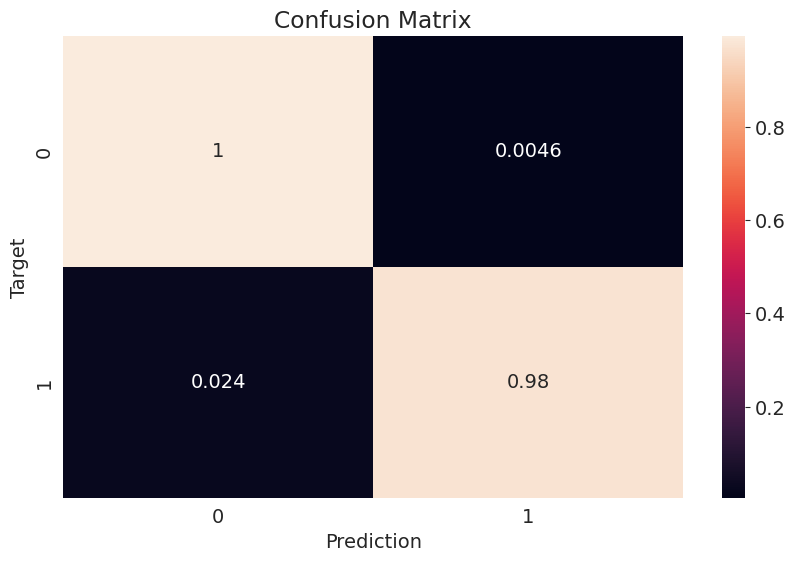

In [97]:
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

Here, we observe that the model correctly predicts benign tumors with an accuracy of approximately 99.54%, demonstrating that our model can be confidently used to predict if a tumor is benign. On the other hand, the model correctly predicts malignant tumors with an accuracy of 97.6%, which is also commendable. Therefore, our model proves to be highly effective and reliable in distinguishing between benign and malignant tumors.

Now, let's compute the model's accuracy on the validation and test sets.

### Validation Set

Accuracy:  0.9736842105263158


Text(0.5, 1.0, 'Confusion Matrix')

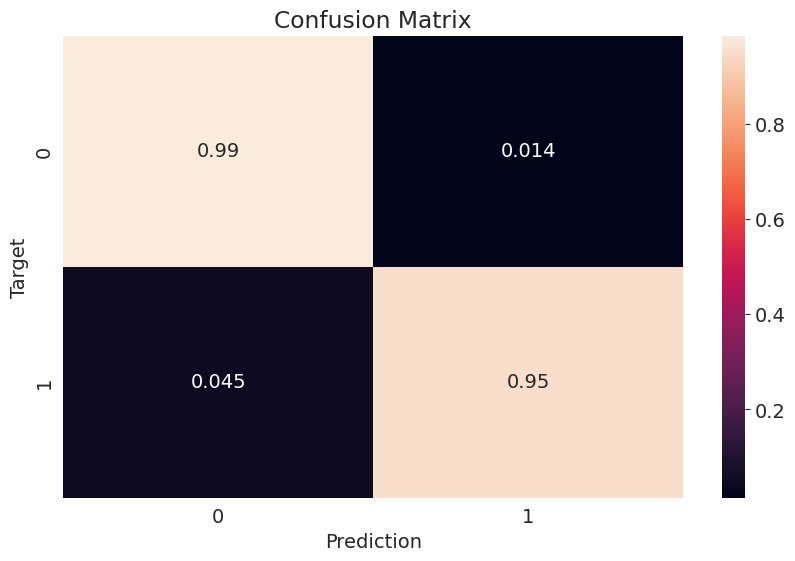

In [98]:
val_preds = model.predict(X_val)
print("Accuracy: ", accuracy_score(val_targets, val_preds))

cm = confusion_matrix(val_targets, val_preds, normalize='true')
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

### Test Set

Accuracy:  0.9736842105263158


Text(0.5, 1.0, 'Confusion Matrix')

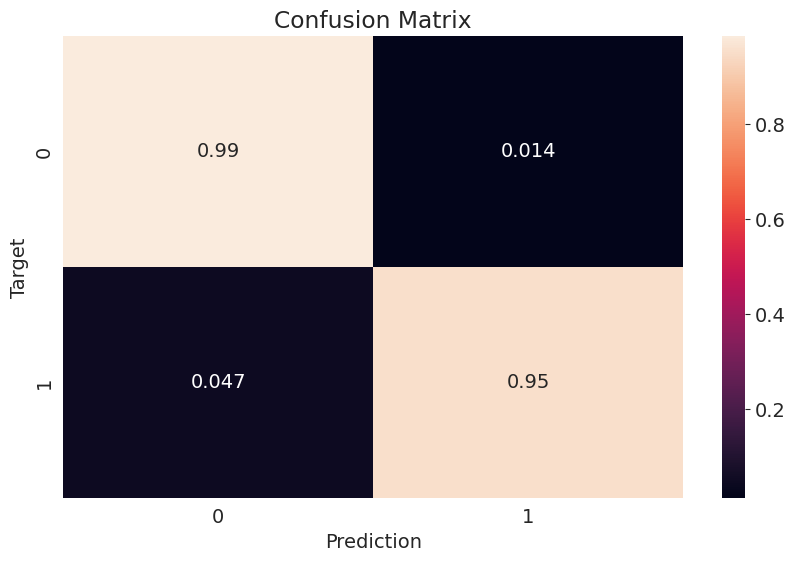

In [99]:
test_preds = model.predict(X_test)
print("Accuracy: ", accuracy_score(test_targets, test_preds))

cm = confusion_matrix(test_targets, test_preds, normalize='true')
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

The model's performance on the validation and test sets shows accuracies of 95.6% and 96.5%, respectively, demonstrating that our model performs well on new data. This also suggests that we did not overfit the model on the training data. Moreover, the model has minimal false positives and false negatives, which means we can confidently use it to reliably detect both benign and malignant tumors.

In order to verify our model actually performs well, let's compare it with two models: one that guesses randomly and another that always return "B".

In [100]:
def random_guess(inputs):
    return np.random.choice(["B", "M"], len(inputs))

In [101]:
def all_B(inputs):
    return np.full(len(inputs), "B")

Now, we check the accuracy score of these models on the test set.

In [102]:
accuracy_score(test_targets, random_guess(X_test))

0.5087719298245614

In [103]:
accuracy_score(test_targets, all_B(X_test))

0.6228070175438597

The random model achieves an accuracy of approximatelt 50.1% and the "always B" model achieves an accuracy of approximately 62.3%. Our model is clearly significantly better than both these models.

## Save the Trained Model

First, creating a dictionary with all the required objects.

In [104]:
data = {
    'model': model,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
}

Now, saving this data to a file using joblib.dump

In [105]:
joblib.dump(data, 'breast_cancer_detection_data.joblib')

['breast_cancer_detection_data.joblib']

Now, this model can be loaded back to make predictions using 'joblib.load'.